# Transition Finance Opportunity Estimator  
## Indian Power Sector

This project explores the scale of transition financing required to decarbonise India's power sector.  
Using publicly available data and transparent assumptions, it estimates transition-related capital expenditure and translates it into potential financing opportunities.

## Why the Power Sector?

India's power sector is one of the largest contributors to national greenhouse gas emissions, primarily due to its historical reliance on coal-based thermal power generation.

As India pursues its climate commitments and long-term net-zero goals, decarbonising the power sector becomes a foundational requirement. A cleaner power mix enables downstream decarbonisation across industries, transport, and households.

However, this transition is capital-intensive and time-bound. Significant investments are required not only in renewable generation, but also in grid modernisation, energy storage, and the gradual phase-down or repurposing of existing thermal assets.

## Why Transition Finance Matters

The transition of the power sector is not only a technological challenge, but also a financial one.

Large-scale deployment of renewable energy, grid upgrades, and asset transitions require substantial long-term capital. Financial institutions play a critical role in enabling this transition through instruments such as:

- Sustainability-linked loans  
- Green loans  
- Green and transition bonds  
- Blended finance structures  

Understanding the scale and structure of these financing needs is essential for directing capital efficiently and accelerating the energy transition.


## Project Scope and Objectives

This project aims to:

- Establish a baseline of India's current power generation capacity
- Identify transition pathways towards a cleaner power mix
- Estimate the capital expenditure required for this transition
- Translate transition capex into potential financing opportunities
- Generate insights relevant for climate finance, banking, and energy strategy roles

The analysis focuses on order-of-magnitude estimates rather than precise forecasts, prioritising transparency and interpretability.


## Assumptions and Limitations

- The analysis relies exclusively on publicly available data
- Cost and financing assumptions are based on industry benchmarks
- Results are indicative and not intended as investment advice
- Regional, regulatory, and project-specific variations are not modelled in detail

Despite these limitations, the framework provides a useful lens for understanding transition finance dynamics at a sector level.

## Capacity and Cost Assumptions

This section establishes a baseline view of India's installed power generation capacity, distinguishing between thermal and renewable sources. This baseline serves as the foundation for estimating transition pathways and associated financing needs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    "Source": ["Coal", "Oil & Gas", "Nuclear","Hydro", "Solar", "Wind", "Biomass", "Small Hydro"],
    "Installed_Capacity_GW": [224.88, 20.72, 8.78, 50.35, 129.92, 53.60, 11.61, 5.16]
}

df = pd.DataFrame(data)
df

,Source,Installed_Capacity_GW
0,Coal,224.88
1,Oil & Gas,20.72
2,Nuclear,8.78
3,Hydro,50.35
4,Solar,129.92
5,Wind,53.60
6,Biomass,11.61
7,Small Hydro,5.16


In [3]:
df["Category"] = df["Source"].apply(
    lambda x: "Thermal" if x in ["Coal", "Oil & Gas"] else "Low Carbon"
)
df

,Source,Installed_Capacity_GW,Category
0,Coal,224.88,Thermal
1,Oil & Gas,20.72,Thermal
2,Nuclear,8.78,Low Carbon
3,Hydro,50.35,Low Carbon
4,Solar,129.92,Low Carbon
5,Wind,53.60,Low Carbon
6,Biomass,11.61,Low Carbon
7,Small Hydro,5.16,Low Carbon


In [4]:
capacity_summary = df.groupby("Category")["Installed_Capacity_GW"].sum()
capacity_summary


Category
Low Carbon    259.42
Thermal       245.60
Name: Installed_Capacity_GW, dtype: float64

In [5]:
capacity_percentage = (capacity_summary / capacity_summary.sum()) * 100
capacity_percentage


Category
Low Carbon    51.368263
Thermal       48.631737
Name: Installed_Capacity_GW, dtype: float64

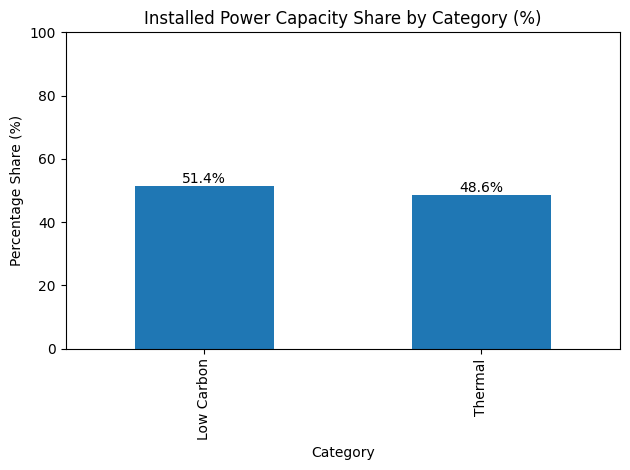

In [6]:
ax = capacity_percentage.plot(
    kind="bar",
    title="Installed Power Capacity Share by Category (%)",
    ylabel="Percentage Share (%)",
    xlabel="Category"
)

for i, value in enumerate(capacity_percentage):
    ax.text(i, value + 1, f"{value:.1f}%", ha="center")

plt.ylim(0, 100)
plt.tight_layout()
plt.show()


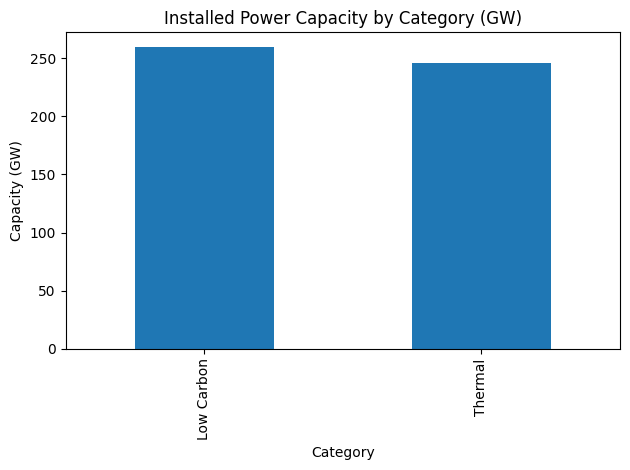

In [7]:
capacity_summary.plot(
    kind="bar",
    title="Installed Power Capacity by Category (GW)",
    ylabel="Capacity (GW)",
    xlabel="Category"
)
plt.tight_layout()
plt.show()
